In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
from google.colab import files
uploaded = files.upload()

Saving aspiring_minds_employability_outcomes_2015.xlsx to aspiring_minds_employability_outcomes_2015.xlsx


In [4]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [5]:
df.shape

(3998, 39)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

27

In [9]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [10]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [11]:
df.drop(['Unnamed: 0','ID','10board','12board','CollegeID','CollegeCityID'],axis=1,inplace=True)
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage  12graduation  12percentage  ...  \
0  Bangalore      f 1990-02-19          84.3          2007          95.8  ...   
1     Indore      m 1989-10-04          85.4          2007          85.0  ...   
2    Chennai      f 1992-08-03          85.0          2010          68.2  ...   
3    Gurgaon      m 1989-12-05          85.6          2007          83.6  ...   
4    Manesar      m 1991-02-27          78.0          2008          76.8  ...   

   ComputerScience MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1             -1             -1           -1         -1   
1               -1             -1             -1           -1         -1   
2               -1             -1             -1           -1         -1   
3               -1             -1             -1           -1         -1   
4               -1             -1             -1           -1         -1   

  conscientiousness  agreeableness  extraversion  nueroticism  \
0            0.9737         0.8128        0.5269      1.35490   
1           -0.7335         0.3789        1.2396     -0.10760   
2            0.2718         1.7109        0.1637     -0.86820   
3            0.0464         0.3448       -0.3440     -0.40780   
4           -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 33 columns]

In [12]:
df.shape

(3998, 33)

In [13]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '12graduation', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

Skewness:6.45
Kurtosis:80.93


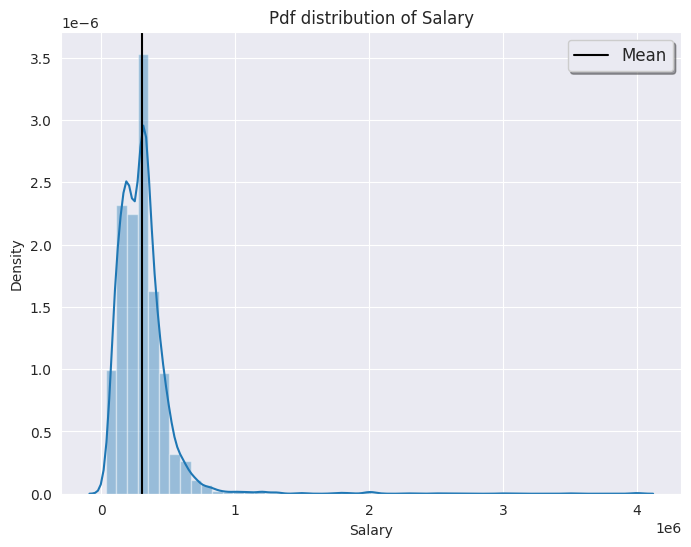

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='black', label='Mean')
plt.title("Pdf distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

skew = df['Salary'].skew()
kurt = df['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

Skewness:-0.59
Kurtosis:-0.11


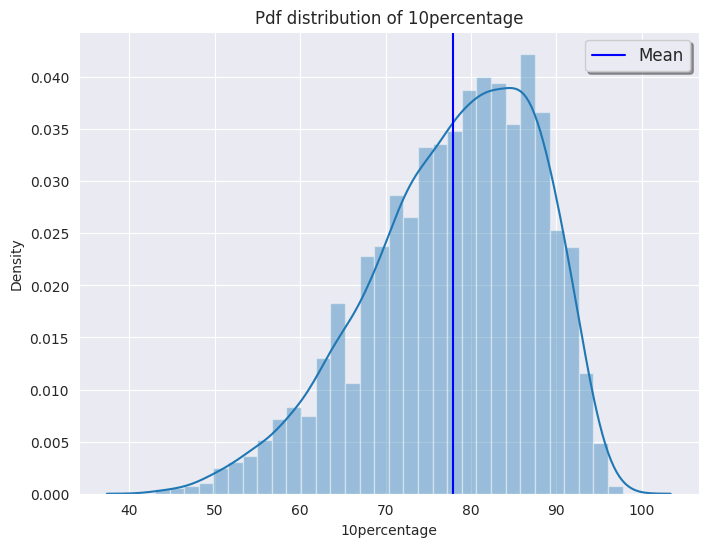

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['10percentage'])
plt.axvline(df['10percentage'].mean(), color="blue", label="Mean")
plt.title("Pdf distribution of 10percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['10percentage'].skew()
kurt = df['10percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

Skewness:-0.03
Kurtosis:-0.63


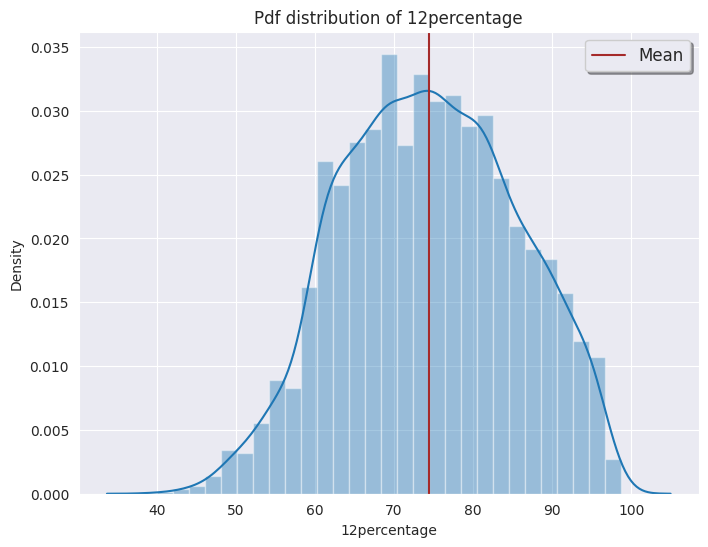

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['12percentage'])
plt.axvline(df['12percentage'].mean(), color="brown", label="Mean")
plt.title("Pdf distribution of 12percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['12percentage'].skew()
kurt = df['12percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

Skewness:-1.25
Kurtosis:10.23


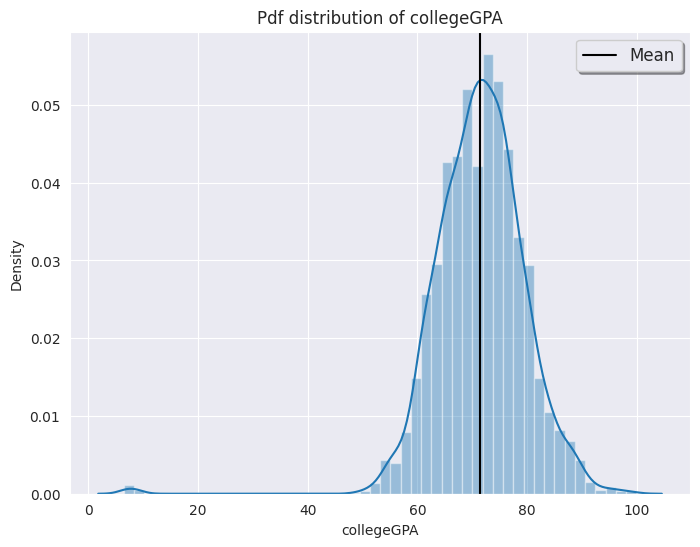

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['collegeGPA'])
plt.axvline(df['collegeGPA'].mean(), color="black", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True,fontsize="larger")

skew = df['collegeGPA'].skew()
kurt = df['collegeGPA'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

In [21]:
df['Designation']

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: object

In [22]:
designations = df['Designation'].unique()
len(designations) 

419

In [23]:
designation_count = df['Designation'].value_counts()
designation_count

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [24]:
designation_count[:15]

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Job Designation of a CSE Fresher')

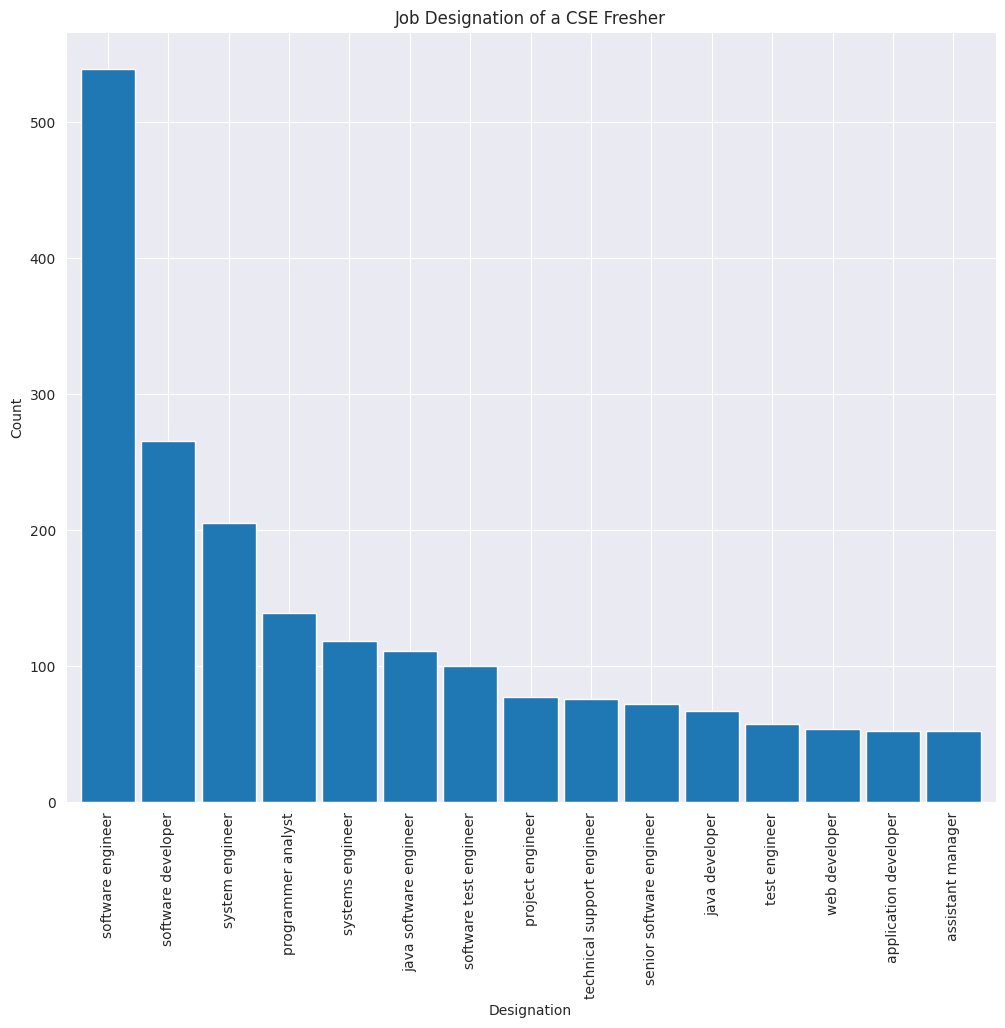

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
designation_count[:15].plot(kind='bar' , width=0.9)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Job Designation of a CSE Fresher')

In [26]:
df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [27]:
jobcities = df['JobCity'].unique()
len(jobcities)

339

In [28]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [29]:
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)

In [30]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore           627
Noida               368
Hyderabad           335
Pune                290
Chennai             272
                   ... 
Asansol               1
Tirunelvelli          1
Ernakulam             1
Nanded                1
Asifabadbanglore      1
Name: JobCity, Length: 338, dtype: int64

In [31]:
jobcities_count[:10]

Bangalore    627
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Gurgaon      198
New Delhi    196
Mumbai       108
Kolkata       98
Jaipur        46
Name: JobCity, dtype: int64

Text(0.5, 1.0, 'Preferred Cities')

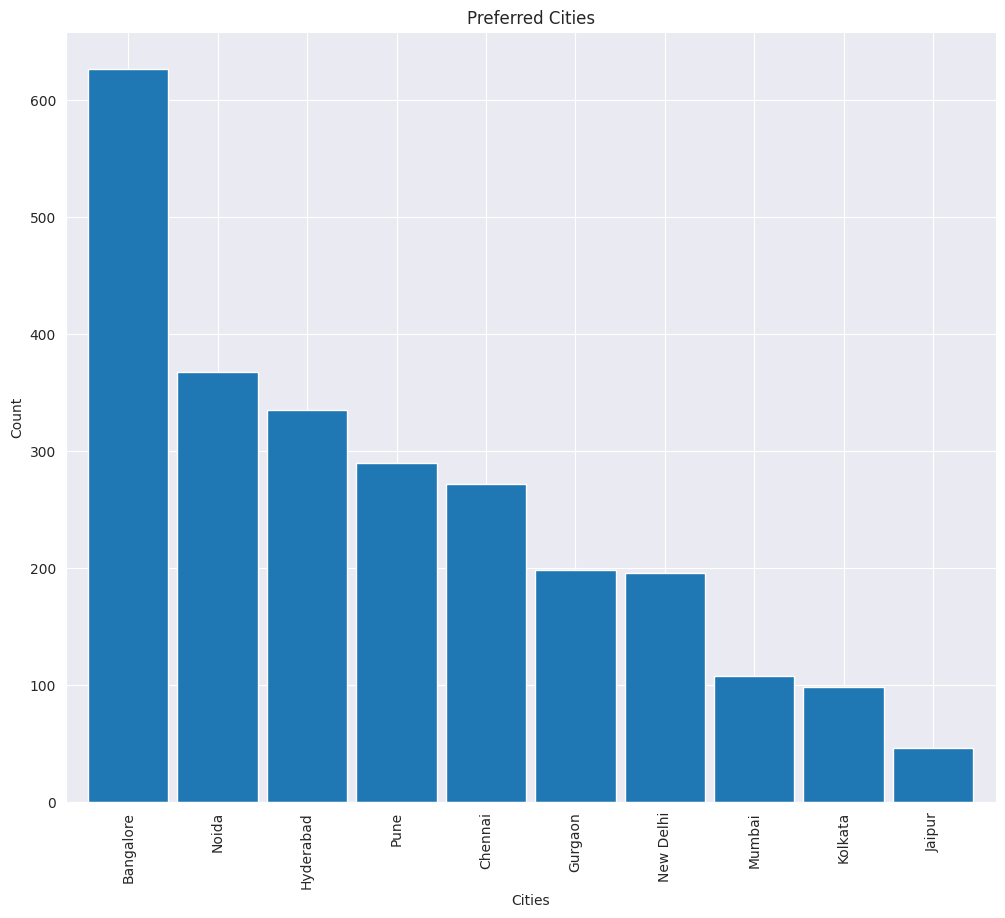

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
jobcities_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Preferred Cities')

In [33]:
df['Degree']

0       B.Tech/B.E.
1       B.Tech/B.E.
2       B.Tech/B.E.
3       B.Tech/B.E.
4       B.Tech/B.E.
           ...     
3993    B.Tech/B.E.
3994    B.Tech/B.E.
3995    B.Tech/B.E.
3996    B.Tech/B.E.
3997    B.Tech/B.E.
Name: Degree, Length: 3998, dtype: object

In [34]:
uniq_degree = df['Degree'].unique()
len(uniq_degree)

4

In [35]:
degree_count = df['Degree'].value_counts()
degree_count

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

Text(0.5, 1.0, 'Degree obtained/pursued by the candidate')

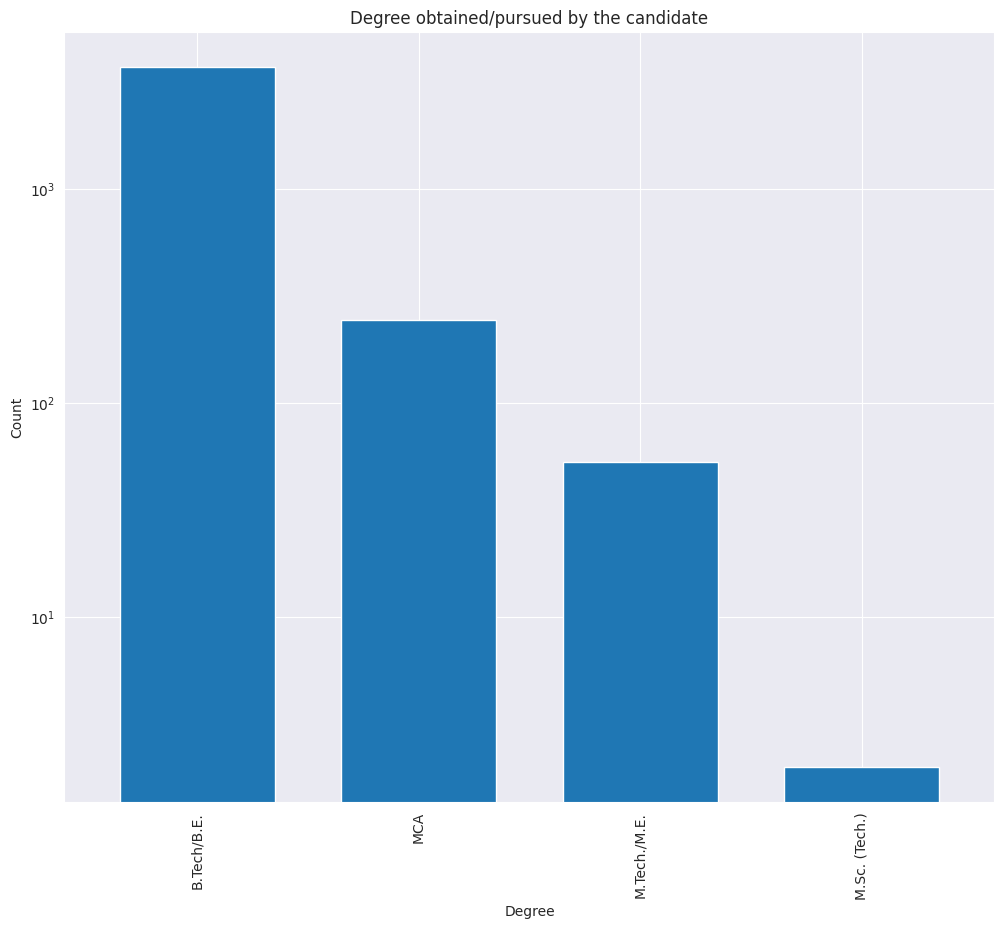

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
degree_count.plot(kind='bar' , width=0.7 , logy=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree obtained/pursued by the candidate')

In [37]:
df['Specialization']

0                            computer engineering
1       electronics and communication engineering
2                          information technology
3                            computer engineering
4       electronics and communication engineering
                          ...                    
3993                       information technology
3994    electronics and communication engineering
3995                         computer engineering
3996               computer science & engineering
3997                       information technology
Name: Specialization, Length: 3998, dtype: object

In [38]:
uniq_specialization = df['Specialization'].unique()
len(uniq_specialization)

46

In [39]:
specialization_count = df['Specialization'].value_counts()
specialization_count

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [40]:
specialization_count[:10]

electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'Specialization pursued by the candidate')

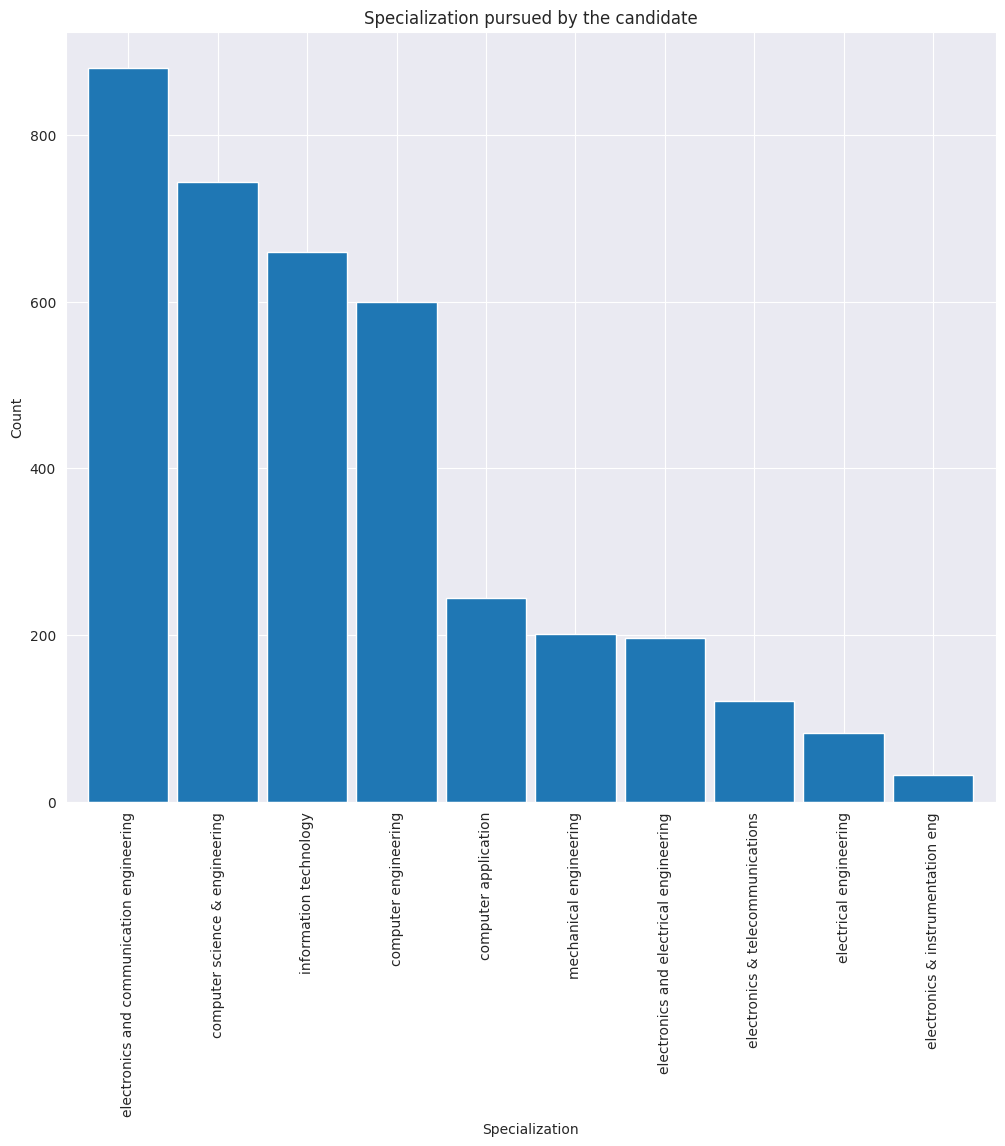

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
specialization_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization pursued by the candidate')

In [42]:
df['CollegeState']

0       Andhra Pradesh
1       Madhya Pradesh
2        Uttar Pradesh
3                Delhi
4        Uttar Pradesh
             ...      
3993           Haryana
3994         Telangana
3995            Orissa
3996         Karnataka
3997        Tamil Nadu
Name: CollegeState, Length: 3998, dtype: object

In [43]:
uniq_collegestate = df['CollegeState'].unique()
len(uniq_collegestate)

26

In [44]:
college_state_count = df['CollegeState'].value_counts()
college_state_count

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

Text(0.5, 1.0, 'College State Distribution')

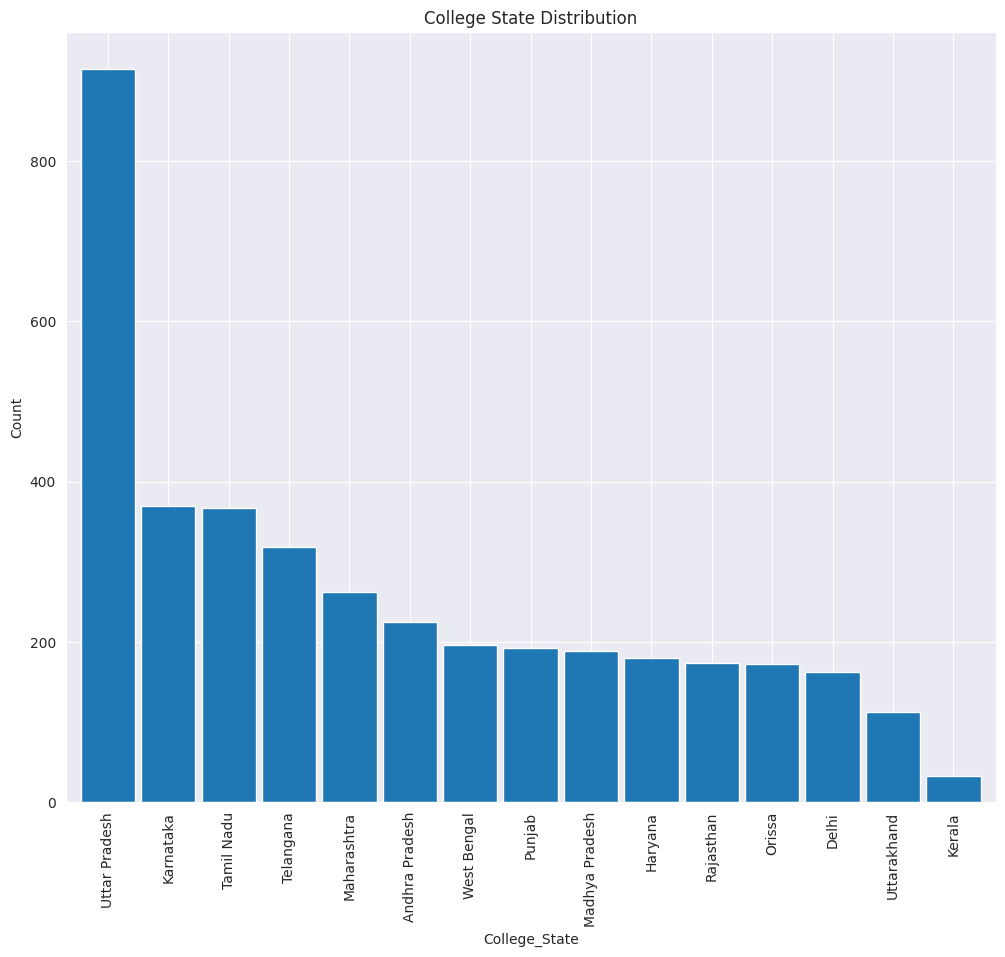

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
college_state_count[:15].plot(kind='bar' , width=0.9)
plt.xlabel('College_State')
plt.ylabel('Count')
plt.title('College State Distribution')

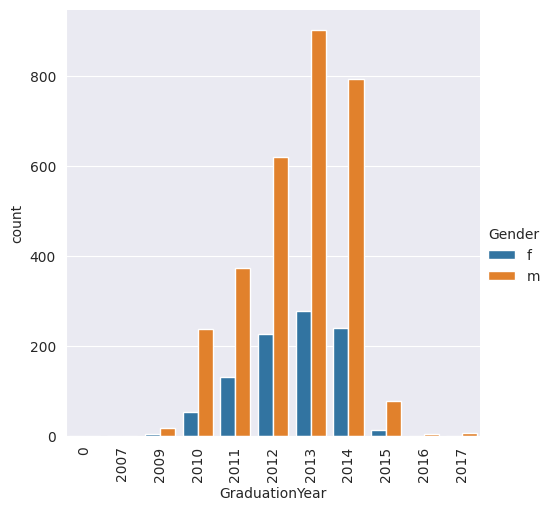

In [46]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

In [47]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '12graduation', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

<Axes: >

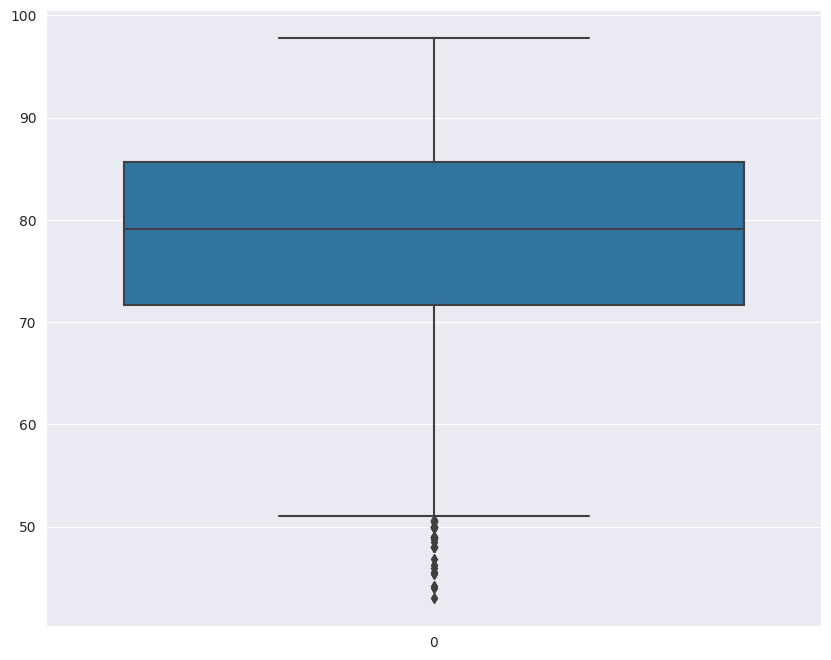

In [48]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['10percentage'])

In [49]:
df['10percentage'][df['10percentage']<52].reset_index()

index  10percentage
0     108         51.00
1     245         50.60
2     466         44.16
3     490         44.00
4     491         45.60
5     502         48.00
6     600         49.00
7     613         48.00
8     887         51.20
9     898         49.00
10    919         48.80
11   1064         49.00
12   1102         49.00
13   1169         48.50
14   1193         48.00
15   1235         50.60
16   1334         43.00
17   1838         50.00
18   1845         49.00
19   1955         45.33
20   1976         46.24
21   2024         51.36
22   2037         48.00
23   2123         51.00
24   2215         50.50
25   2217         51.00
26   2292         50.00
27   2432         50.00
28   2563         51.60
29   2655         50.66
30   2885         46.80
31   2982         50.00
32   3284         50.00
33   3425         50.00
34   3507         51.83
35   3525         51.42
36   3690         46.00
37   3743         49.90

<Axes: >

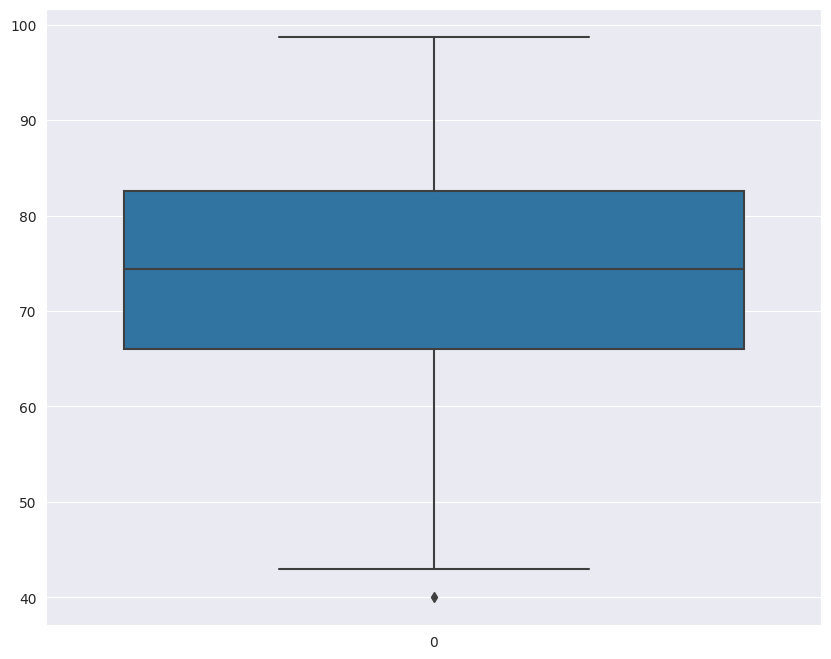

In [50]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['12percentage'])

In [51]:
df['10percentage'][df['10percentage']<44].reset_index()

index  10percentage
0   1334          43.0

<Axes: >

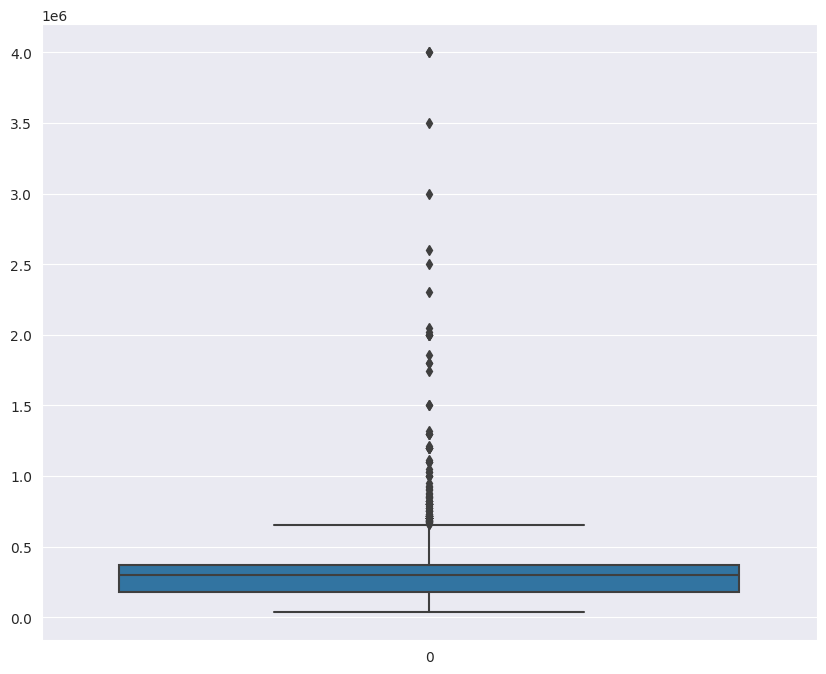

In [52]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Salary'])

<Axes: >

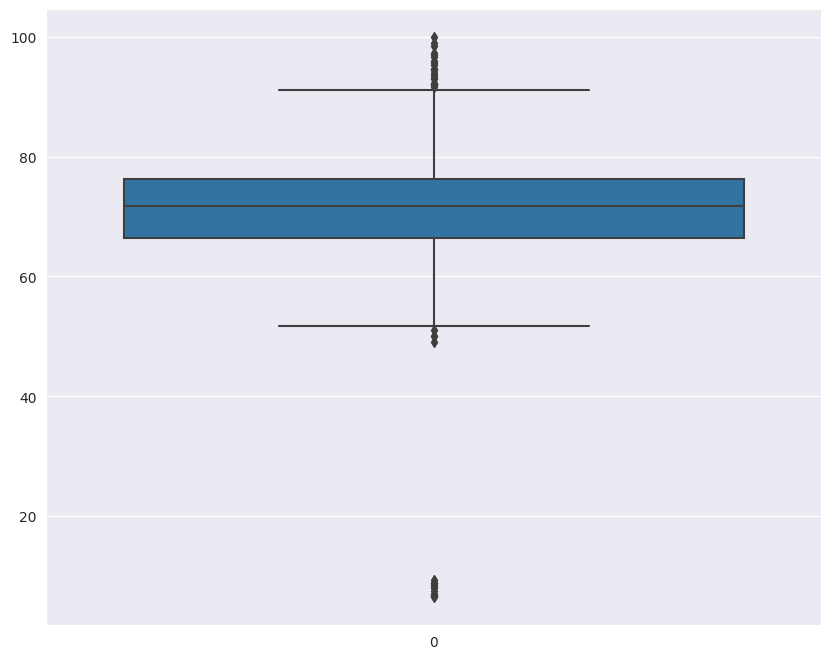

In [53]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['collegeGPA'])

In [54]:
df['collegeGPA'][(df['collegeGPA']<53) | (df['collegeGPA']>93)].reset_index()

index  collegeGPA
0       7        8.58
1     138        6.63
2     324       52.00
3     614       93.60
4     690       99.93
5     788        6.80
6     874       94.50
7     907       50.00
8     968       52.00
9    1134       96.00
10   1264       97.30
11   1345       93.30
12   1400       51.80
13   1419        6.85
14   1439        8.07
15   1510       96.70
16   1685       94.70
17   1767        7.56
18   2125       52.00
19   2151        6.95
20   2152       95.30
21   2229        8.13
22   2293        9.30
23   2410       52.00
24   2662        8.88
25   2691        8.89
26   2703       94.00
27   2836       49.07
28   2988       94.60
29   3151       98.40
30   3276       95.70
31   3293       51.00
32   3308        6.45
33   3323       96.90
34   3448       50.00
35   3590       52.00
36   3850       99.00

<Axes: >

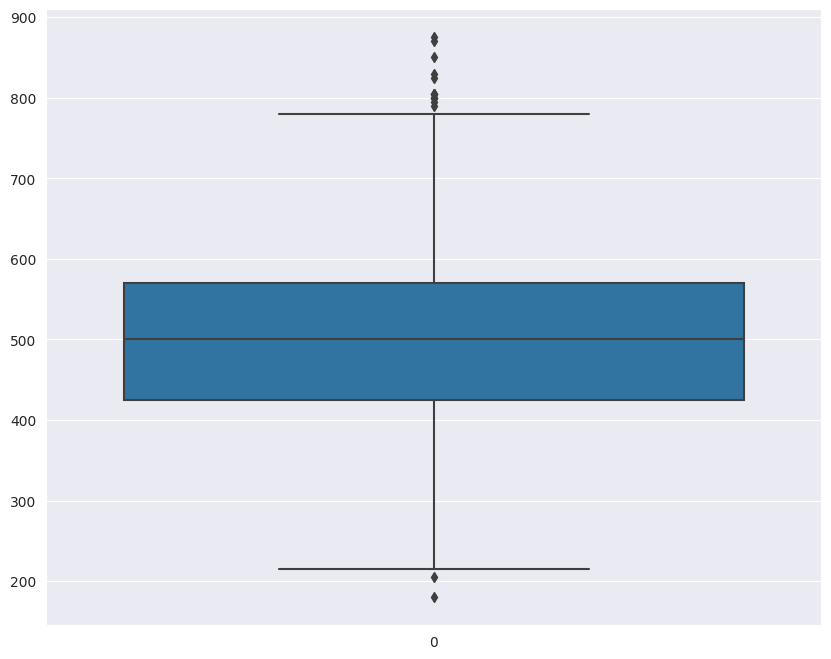

In [55]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['English'])

In [56]:
df['English'][(df['English']<220) | (df['English']>790)].reset_index()

index  English
0     275      875
1     444      825
2     624      215
3     668      870
4     847      800
5     935      205
6    1183      805
7    1217      180
8    1450      830
9    1519      795
10   2077      800
11   2122      800
12   2273      215
13   2385      805
14   2596      805
15   3044      850

<Axes: >

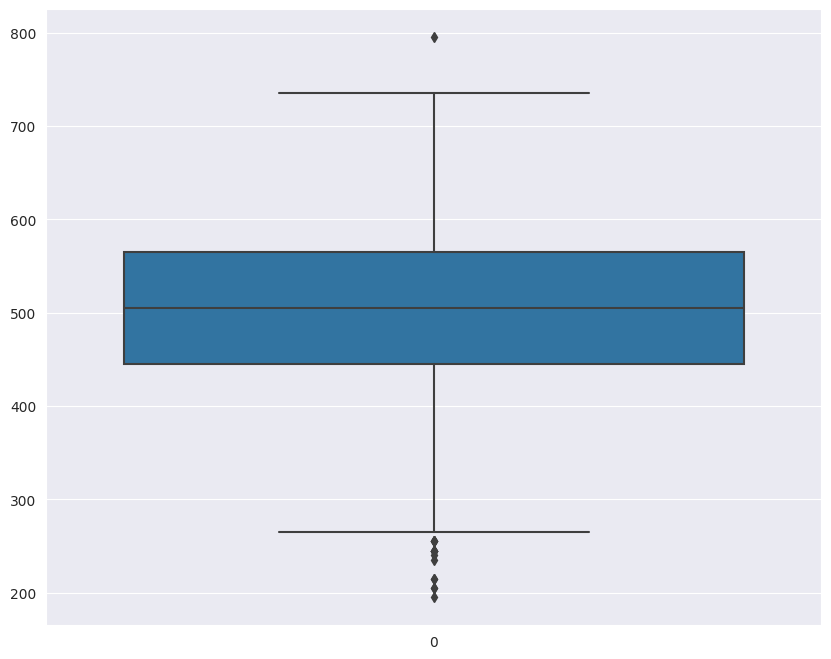

In [57]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Logical'])

In [58]:
df['Logical'][(df['Logical']<260) | (df['Logical']>790)].reset_index()

index  Logical
0     101      255
1     133      205
2     207      245
3     345      215
4     628      215
5    1014      795
6    1160      255
7    1439      245
8    2141      255
9    2265      255
10   2796      240
11   2830      195
12   2891      245
13   3119      245
14   3159      245
15   3784      205
16   3876      235
17   3953      245

<Axes: >

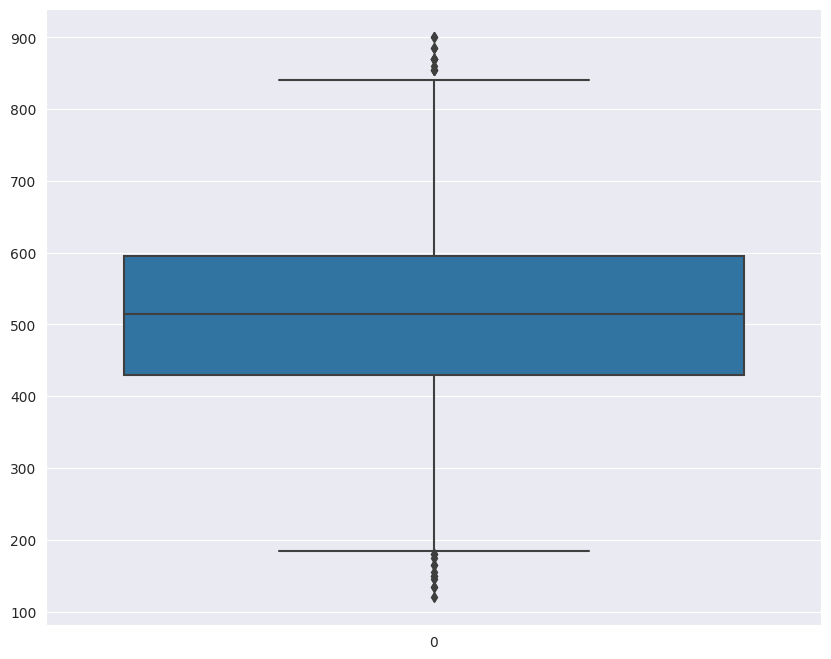

In [59]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Quant'])

In [60]:
df['Quant'][(df['Quant']<190) | (df['Quant']>850)].reset_index()

index  Quant
0     195    870
1     522    165
2     564    180
3     698    860
4     783    180
5     899    870
6    1148    175
7    1310    870
8    1661    870
9    1815    135
10   2007    855
11   2134    145
12   2155    870
13   2411    885
14   2437    120
15   2490    900
16   2616    135
17   2932    165
18   2957    900
19   2988    885
20   3165    855
21   3239    855
22   3258    150
23   3283    150
24   3544    185
25   3616    155

<Axes: >

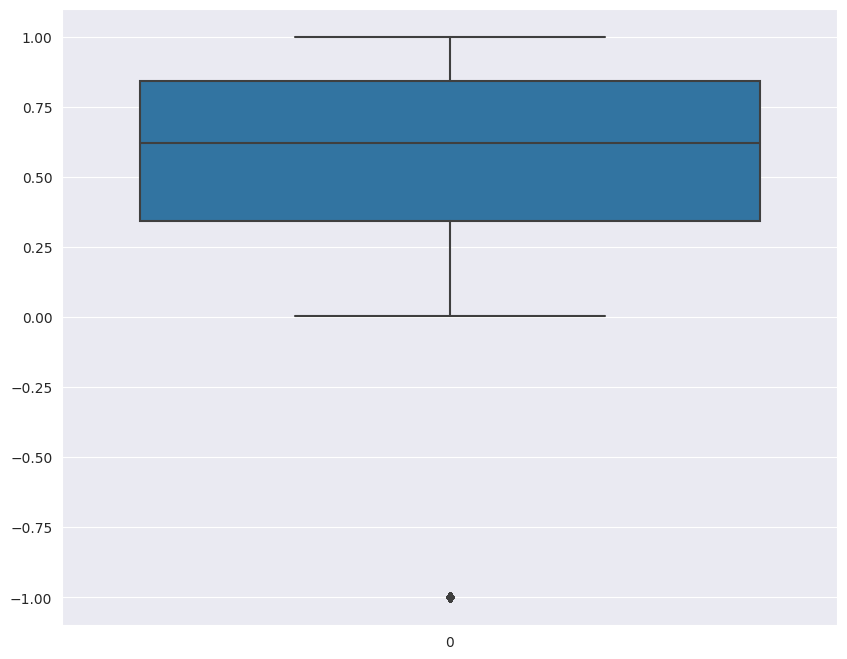

In [61]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Domain'])

In [62]:
df['Domain'][df['Domain'] <= -1].value_counts().reset_index()

index  Domain
0   -1.0     246

<Axes: >

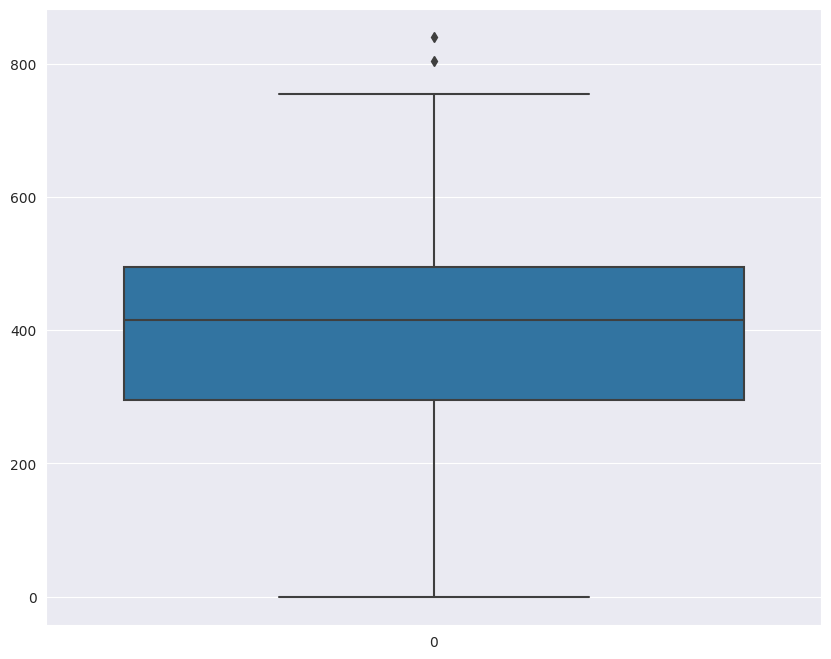

In [63]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ComputerProgramming'])

In [64]:
df['ComputerProgramming'][df['ComputerProgramming'] > 800].reset_index()

index  ComputerProgramming
0     64                  804
1   1711                  840

<Axes: >

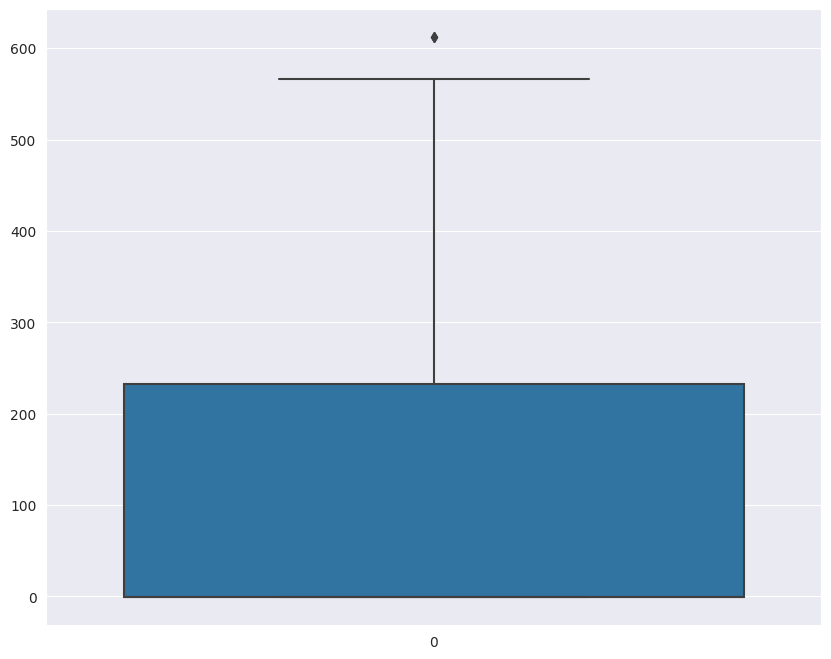

In [65]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ElectronicsAndSemicon'])

In [66]:
df['ElectronicsAndSemicon'][df['ElectronicsAndSemicon'] > 600].reset_index()

index  ElectronicsAndSemicon
0   1557                    612
1   3889                    612

<Axes: >

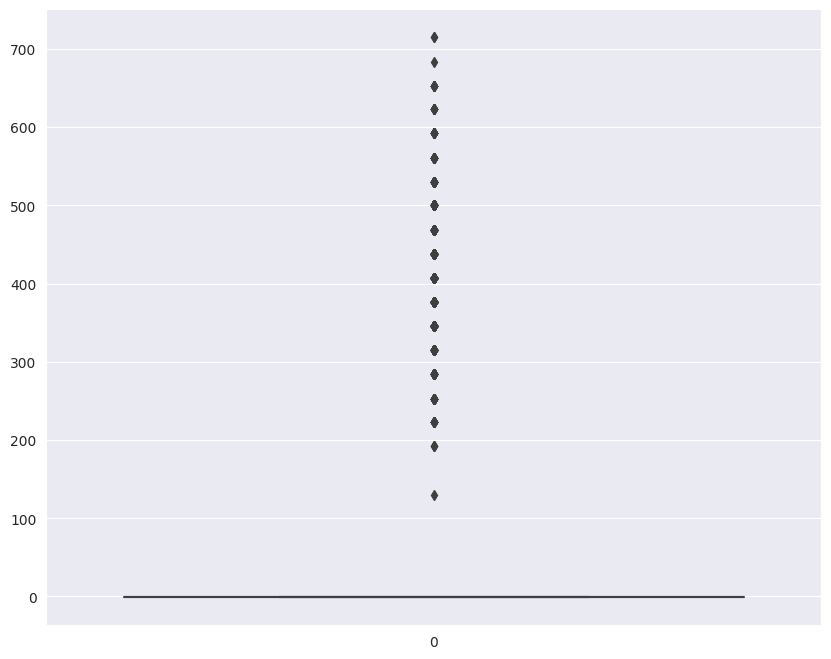

In [67]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ComputerScience'])

In [68]:
df['ComputerScience'][df['ComputerScience'] > 100].value_counts().reset_index()

index  ComputerScience
0     407              128
1     376              123
2     346              118
3     438              111
4     469               80
5     315               77
6     500               64
7     284               50
8     530               45
9     253               30
10    561               22
11    223               14
12    592               14
13    623               10
14    653                9
15    192                3
16    715                2
17    684                1
18    130                1

<Axes: >

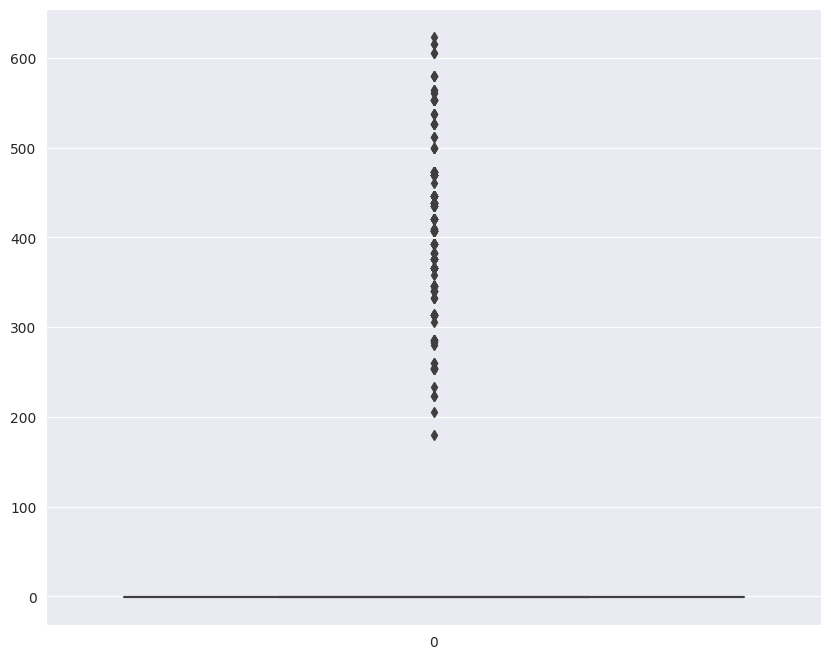

In [69]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['MechanicalEngg'])

In [70]:
df['MechanicalEngg'][df['MechanicalEngg'] > 170].value_counts().reset_index()

index  MechanicalEngg
0     366              20
1     446              16
2     438              15
3     420              14
4     376              13
5     313              13
6     393              13
7     407              12
8     346              11
9     473              10
10    469              10
11    553               8
12    435               7
13    340               6
14    383               6
15    526               5
16    286               5
17    409               5
18    500               4
19    253               4
20    538               3
21    254               3
22    580               3
23    332               3
24    284               3
25    606               2
26    616               2
27    564               2
28    223               2
29    512               2
30    561               2
31    260               2
32    358               1
33    280               1
34    315               1
35    233               1
36    306               1
37    461               1
38    180               1
39    206               1
40    623               1

<Axes: >

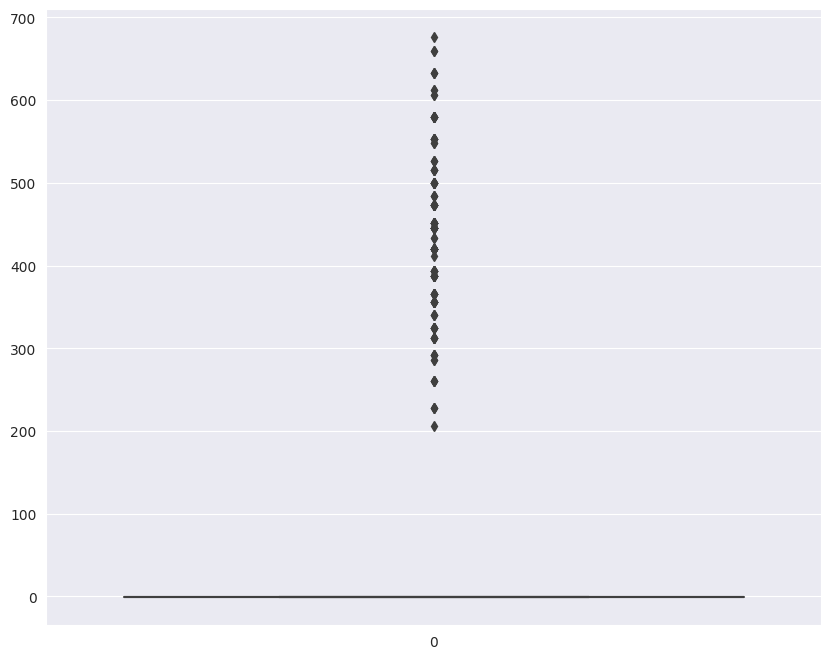

In [71]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ElectricalEngg'])

In [72]:
df['ElectricalEngg'][df['ElectricalEngg'] > 200].value_counts().reset_index()

index  ElectricalEngg
0     420              16
1     446              14
2     388              10
3     473              10
4     452              10
5     356               9
6     500               8
7     580               8
8     393               7
9     324               7
10    366               7
11    313               6
12    553               6
13    516               5
14    292               4
15    260               4
16    340               3
17    228               3
18    484               3
19    526               3
20    633               3
21    286               2
22    660               2
23    612               2
24    433               2
25    548               2
26    606               2
27    676               1
28    411               1
29    206               1

<Axes: >

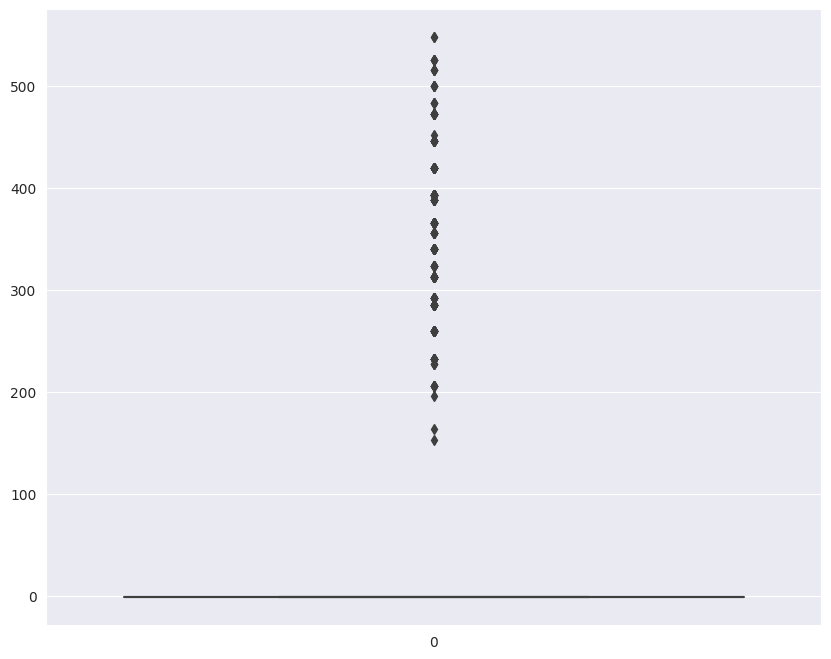

In [73]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['TelecomEngg'])

In [74]:
df['TelecomEngg'][df['TelecomEngg'] > 150].value_counts().reset_index()

index  TelecomEngg
0     393           45
1     366           43
2     260           35
3     313           34
4     340           32
5     286           31
6     420           26
7     446           16
8     388           14
9     233           14
10    473           13
11    292           13
12    356           12
13    324           11
14    206            8
15    500            5
16    526            5
17    516            4
18    484            4
19    228            3
20    548            2
21    153            1
22    196            1
23    164            1
24    452            1

In [75]:
df.corr()

Salary  10percentage  12graduation  12percentage  \
Salary                 1.000000      0.177373     -0.161383      0.170254   
10percentage           0.177373      1.000000      0.269957      0.643378   
12graduation          -0.161383      0.269957      1.000000      0.259166   
12percentage           0.170254      0.643378      0.259166      1.000000   
CollegeTier           -0.179332     -0.126042      0.027691     -0.100771   
collegeGPA             0.130103      0.312538      0.086001      0.346137   
CollegeCityTier        0.015384      0.116707     -0.003016      0.130462   
GraduationYear        -0.010053     -0.013799      0.014457     -0.012933   
English                0.178219      0.350780      0.147925      0.212888   
Logical                0.179275      0.316014      0.105887      0.243571   
Quant                  0.230627      0.317640      0.001379      0.312413   
Domain                 0.104656      0.078563     -0.034163      0.074099   
ComputerProgramming    0.115665      0.053600     -0.047995      0.080818   
ElectronicsAndSemicon  0.000665      0.085179     -0.005891      0.117112   
ComputerScience       -0.100720     -0.018933      0.293439     -0.043534   
MechanicalEngg         0.018475      0.050364      0.035459      0.037635   
ElectricalEngg        -0.047598      0.074419      0.123751      0.064001   
TelecomEngg           -0.022691      0.049378      0.023470      0.044201   
CivilEngg              0.037639      0.030002     -0.004727      0.005910   
conscientiousness     -0.064148      0.067657      0.103329      0.058299   
agreeableness          0.057423      0.136645      0.041182      0.103998   
extraversion          -0.010213     -0.004679      0.061956     -0.007486   
nueroticism           -0.054685     -0.132496     -0.074369     -0.094369   
openess_to_experience -0.011312      0.036692     -0.015069      0.006332   

                       CollegeTier  collegeGPA  CollegeCityTier  \
Salary                   -0.179332    0.130103         0.015384   
10percentage             -0.126042    0.312538         0.116707   
12graduation              0.027691    0.086001        -0.003016   
12percentage             -0.100771    0.346137         0.130462   
CollegeTier               1.000000   -0.086781        -0.101494   
collegeGPA               -0.086781    1.000000         0.017471   
CollegeCityTier          -0.101494    0.017471         1.000000   
GraduationYear           -0.005557    0.008706         0.008152   
English                  -0.183843    0.106478         0.050462   
Logical                  -0.182811    0.196610         0.020353   
Quant                    -0.251103    0.217380         0.007896   
Domain                   -0.061436    0.107252         0.009250   
ComputerProgramming      -0.073644    0.136596         0.064272   
ElectronicsAndSemicon    -0.031573    0.029855         0.041083   
ComputerScience           0.001053    0.007601        -0.010643   
MechanicalEngg           -0.021548   -0.031765        -0.052395   
ElectricalEngg            0.002594    0.052258         0.010311   
TelecomEngg               0.000007   -0.005226         0.049876   
CivilEngg                -0.033722   -0.018950        -0.033392   
conscientiousness         0.055174    0.069582         0.014763   
agreeableness            -0.038055    0.068282         0.005565   
extraversion              0.009970   -0.032684        -0.008203   
nueroticism               0.023778   -0.074859         0.004442   
openess_to_experience    -0.019179    0.028071        -0.016790   

                       GraduationYear   English   Logical  ...  \
Salary                      -0.010053  0.178219  0.179275  ...   
10percentage                -0.013799  0.350780  0.316014  ...   
12graduation                 0.014457  0.147925  0.105887  ...   
12percentage                -0.012933  0.212888  0.243571  ...   
CollegeTier                 -0.005557 -0.183843 -0.182811  ...   
collegeGPA                 

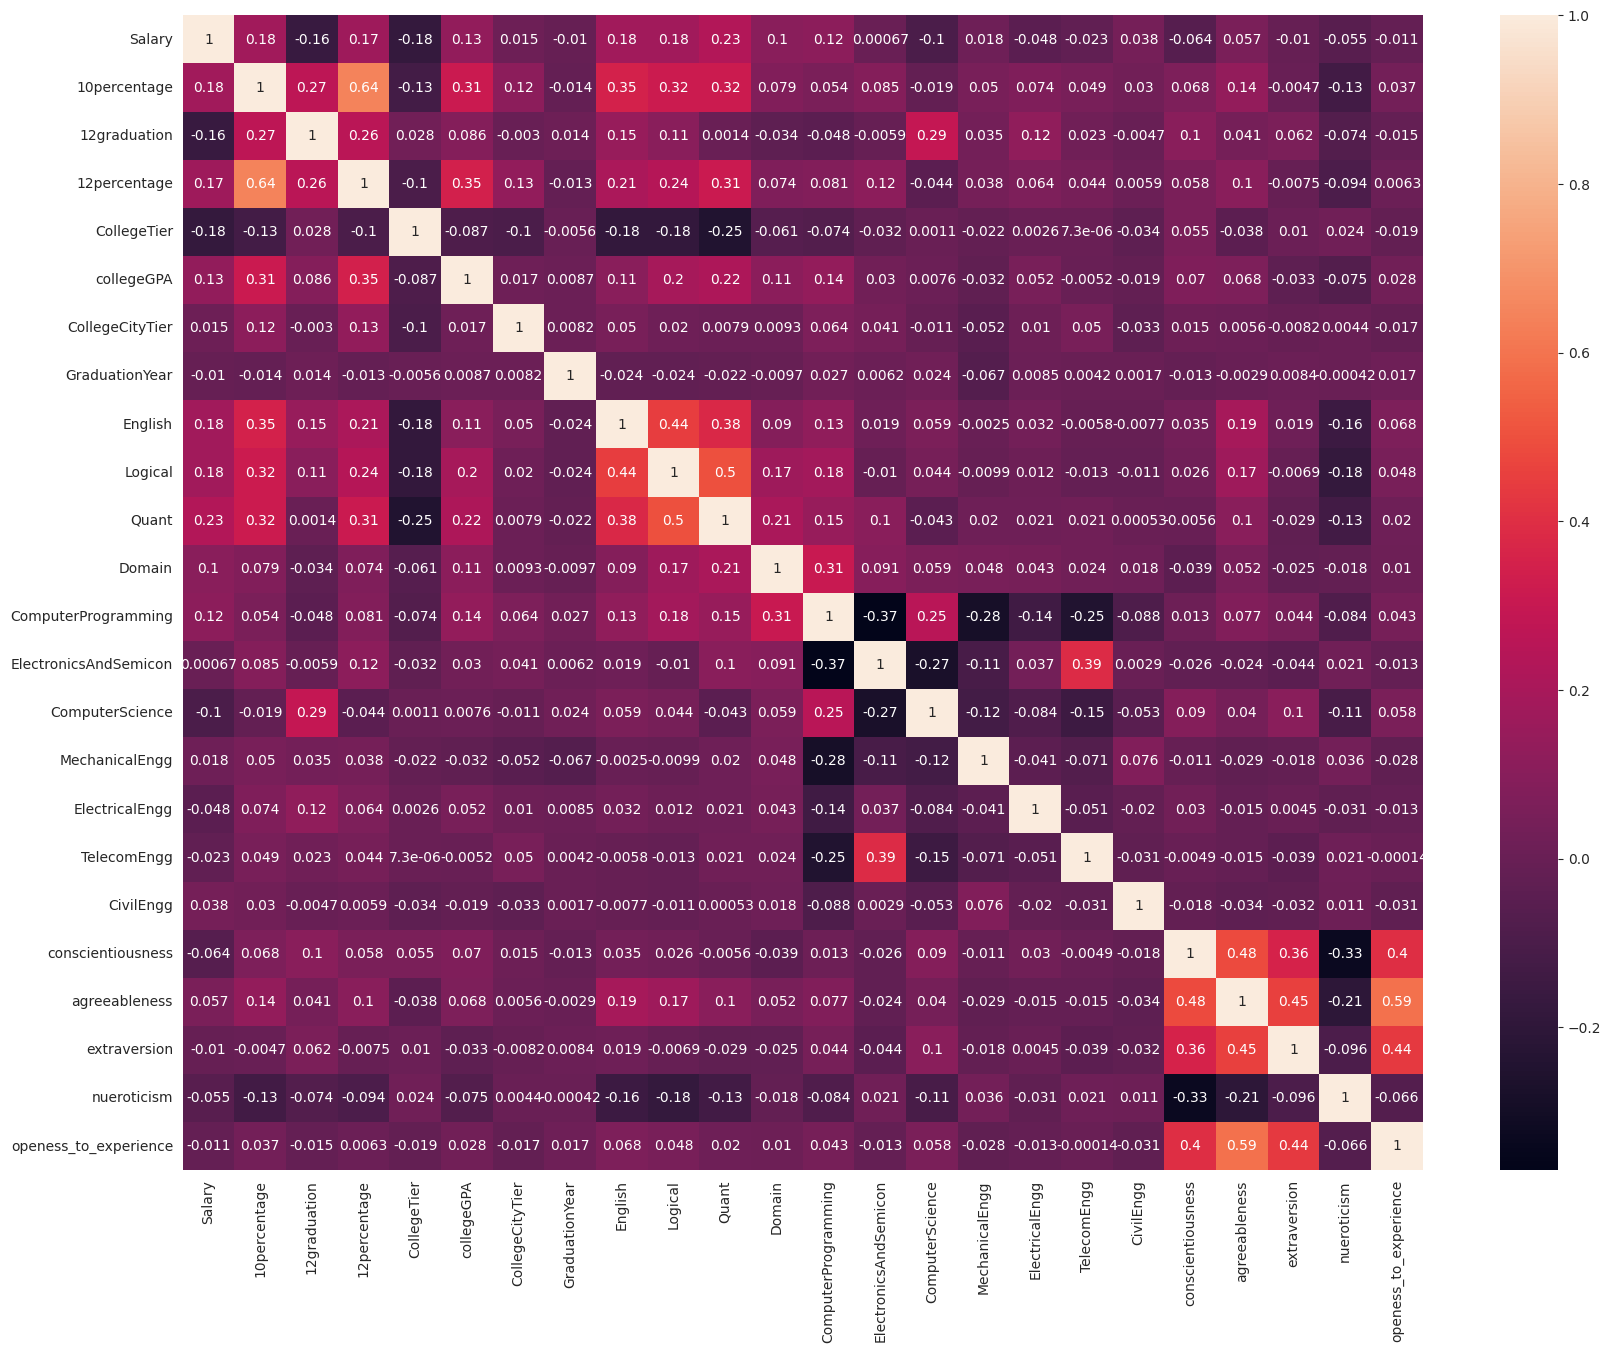

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot=True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

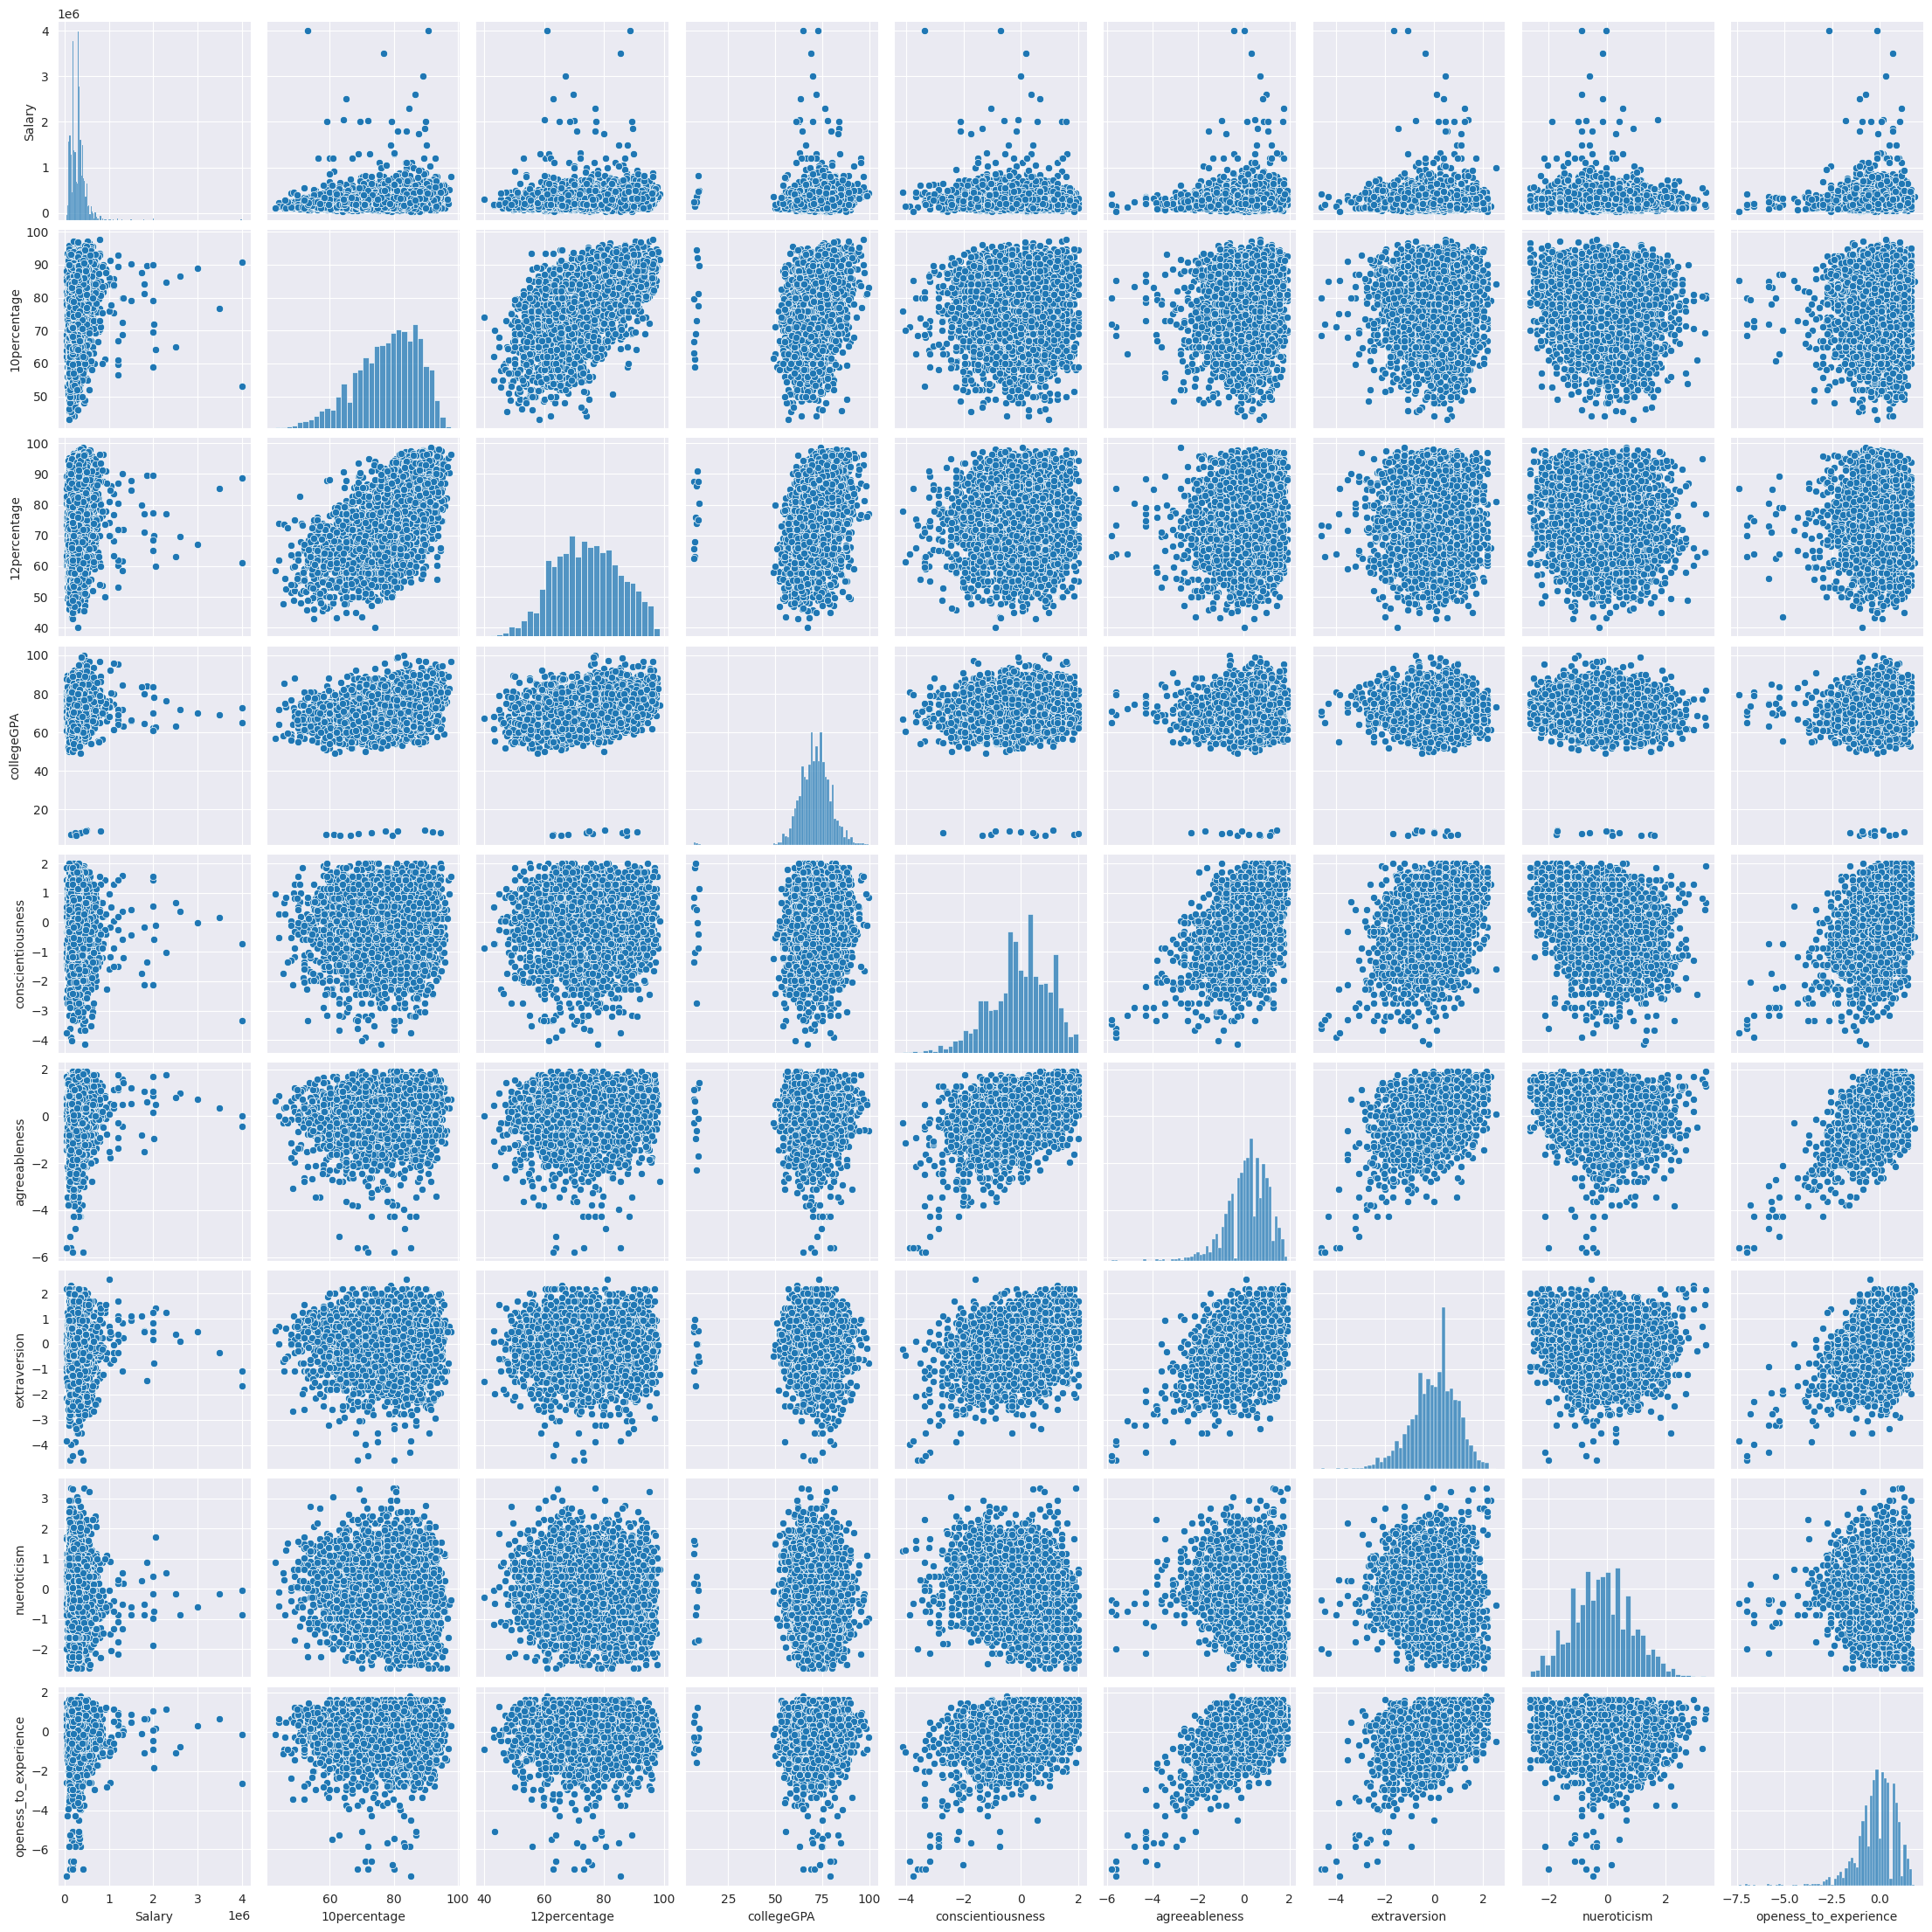

In [77]:
plt.figure(figsize=(20,15))
data = df[['Salary','10percentage','12percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

<Axes: xlabel='10percentage', ylabel='12percentage'>

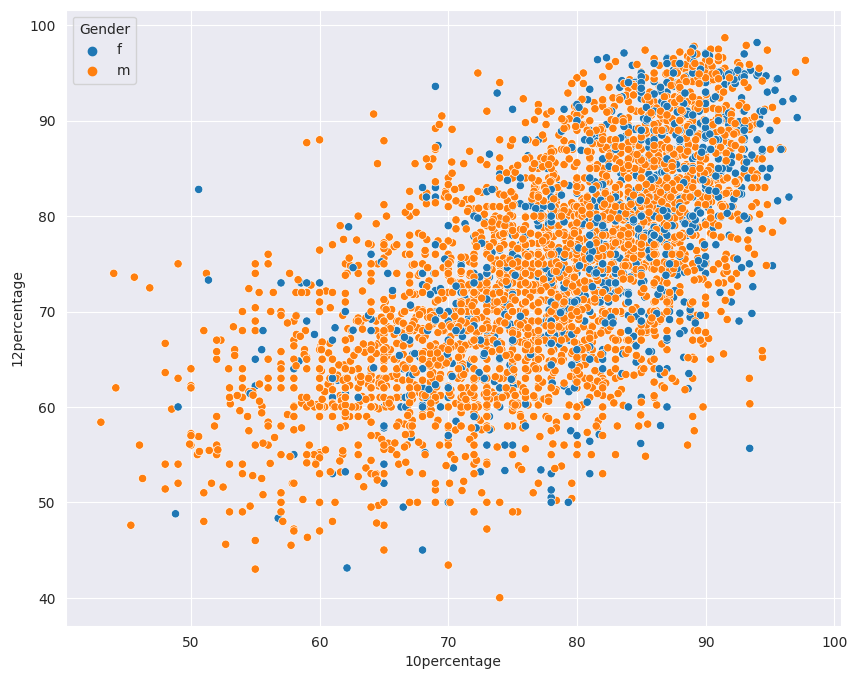

In [78]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="10percentage", y="12percentage",hue="Gender")

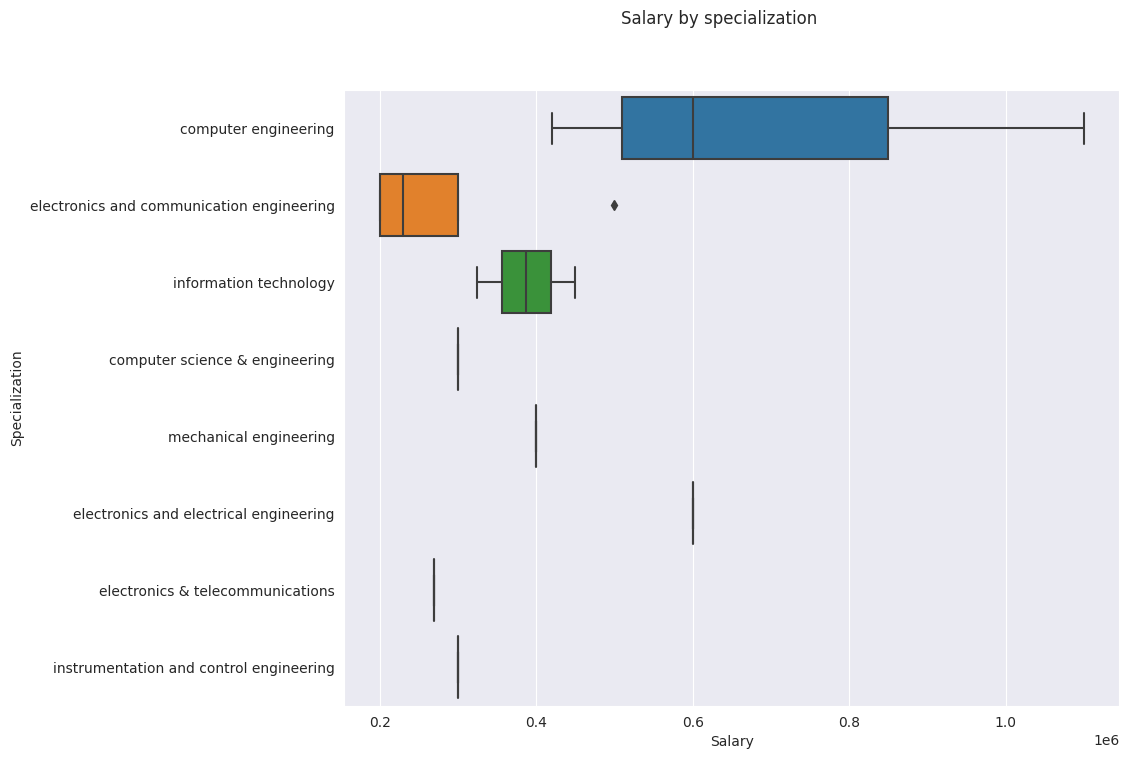

In [79]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(x=df['Salary'].iloc[:15], y = df['Specialization'].iloc[:15])
plt.suptitle('Salary by specialization')
plt.show()

In [80]:
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage  12graduation  12percentage  ...  \
0  Bangalore      f 1990-02-19          84.3          2007          95.8  ...   
1     Indore      m 1989-10-04          85.4          2007          85.0  ...   
2    Chennai      f 1992-08-03          85.0          2010          68.2  ...   
3    Gurgaon      m 1989-12-05          85.6          2007          83.6  ...   
4    Manesar      m 1991-02-27          78.0          2008          76.8  ...   

   ComputerScience MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1             -1             -1           -1         -1   
1               -1             -1             -1           -1         -1   
2               -1             -1             -1           -1         -1   
3               -1             -1             -1           -1         -1   
4               -1             -1             -1           -1         -1   

  conscientiousness  agreeableness  extraversion  nueroticism  \
0            0.9737         0.8128        0.5269      1.35490   
1           -0.7335         0.3789        1.2396     -0.10760   
2            0.2718         1.7109        0.1637     -0.86820   
3            0.0464         0.3448       -0.3440     -0.40780   
4           -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 33 columns]

In [81]:
df['n_sal']=df['Salary']/100000

In [82]:
df[['Designation','Specialization']][df['Designation']=='hardware engineer']

Designation                             Specialization
197   hardware engineer                     electrical engineering
802   hardware engineer  electronics and communication engineering
839   hardware engineer  electronics and communication engineering
1886  hardware engineer  electronics and communication engineering
2070  hardware engineer  electronics and communication engineering
2533  hardware engineer  electronics and communication engineering
3438  hardware engineer                    electronics engineering
3547  hardware engineer  electronics and communication engineering

In [83]:
print('Average Salary :')
print('Programmer Analyst :',round(df['n_sal'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 3.02
Software Engineer : 3.4
Hardware Engineer : nan
Associate Engineer : 3.32


In [84]:
sample = [3.16,3.6,0,3.5]
sample = np.array(sample)

In [85]:
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.565

In [86]:
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.7203391138571102


In [87]:
def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

In [88]:
pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

In [89]:
t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 5.619047619047618


In [90]:
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

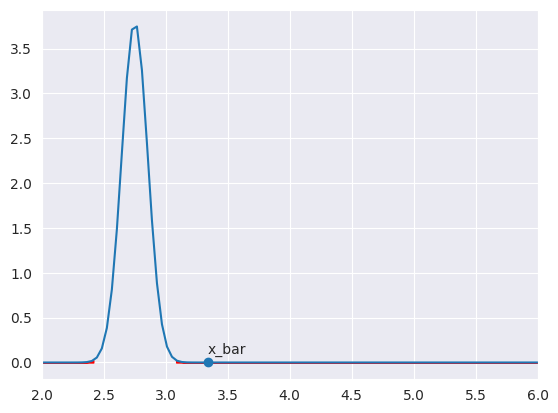

In [91]:
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [92]:
if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [93]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [95]:
scaled_sal = scaler.fit_transform(data['Salary'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_sal[:20])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]
 [0.14249685]
 [0.10466583]
 [0.0592686 ]
 [0.04161412]
 [0.0668348 ]
 [0.07944515]
 [0.07313997]
 [0.05422446]
 [0.02143758]
 [0.07313997]]


In [96]:
scaled_10 = scaler.fit_transform(data['10percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_10[:20])

[[0.75420015]
 [0.7742878 ]
 [0.7669832 ]
 [0.7779401 ]
 [0.63915267]
 [0.8568298 ]
 [0.78670562]
 [0.89481373]
 [0.85829072]
 [0.62089116]
 [0.83272462]
 [0.69393718]
 [0.74141709]
 [0.32505478]
 [0.69758948]
 [0.48466034]
 [0.7815924 ]
 [0.32505478]
 [0.4017531 ]
 [0.65741417]]


In [97]:
scaled_12 = scaler.fit_transform(data['12percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_12[:20])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]
 [0.74446337]
 [0.78364566]
 [0.50817717]
 [0.38160136]
 [0.67972743]
 [0.41618399]
 [0.59284497]
 [0.45417376]
 [0.42248722]
 [0.37819421]]


In [98]:
dummies = pd.get_dummies(df[['Gender']])
dummies

Gender_f  Gender_m
0            1         0
1            0         1
2            1         0
3            0         1
4            0         1
...        ...       ...
3993         0         1
3994         1         0
3995         0         1
3996         1         0
3997         1         0

[3998 rows x 2 columns]

In [99]:
df1 = pd.concat([df,dummies],axis='columns')
df1.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage  12graduation  12percentage  ...  \
0  Bangalore      f 1990-02-19          84.3          2007          95.8  ...   
1     Indore      m 1989-10-04          85.4          2007          85.0  ...   
2    Chennai      f 1992-08-03          85.0          2010          68.2  ...   
3    Gurgaon      m 1989-12-05          85.6          2007          83.6  ...   
4    Manesar      m 1991-02-27          78.0          2008          76.8  ...   

   TelecomEngg CivilEngg conscientiousness  agreeableness  extraversion  \
0           -1        -1            0.9737         0.8128        0.5269   
1           -1        -1           -0.7335         0.3789        1.2396   
2           -1        -1            0.2718         1.7109        0.1637   
3           -1        -1            0.0464         0.3448       -0.3440   
4           -1        -1           -0.8810        -0.2793       -1.0697   

  nueroticism  openess_to_experience  n_sal  Gender_f  Gender_m  
0     1.35490                -0.4455   4.20         1         0  
1    -0.10760                 0.8637   5.00         0         1  
2    -0.86820                 0.6721   3.25         1         0  
3    -0.40780                -0.9194  11.00         0         1  
4     0.09163                -0.1295   2.00         0         1  

[5 rows x 36 columns]

In [100]:
finaldf = df1.drop(['Gender','Gender_f'],axis='columns')
finaldf

Salary        DOJ                  DOL                  Designation  \
0      420000 2012-06-01              present      senior quality engineer   
1      500000 2013-09-01              present            assistant manager   
2      325000 2014-06-01              present             systems engineer   
3     1100000 2011-07-01              present     senior software engineer   
4      200000 2014-03-01  2015-03-01 00:00:00                          get   
...       ...        ...                  ...                          ...   
3993   280000 2011-10-01  2012-10-01 00:00:00            software engineer   
3994   100000 2013-07-01  2013-07-01 00:00:00             technical writer   
3995   320000 2013-07-01              present  associate software engineer   
3996   200000 2014-07-01  2015-01-01 00:00:00           software developer   
3997   400000 2013-02-01              present      senior systems engineer   

               JobCity        DOB  10percentage  12graduation  12percentage  \
0            Bangalore 1990-02-19         84.30          2007         95.80   
1               Indore 1989-10-04         85.40          2007         85.00   
2              Chennai 1992-08-03         85.00          2010         68.20   
3              Gurgaon 1989-12-05         85.60          2007         83.60   
4              Manesar 1991-02-27         78.00          2008         76.80   
...                ...        ...           ...           ...           ...   
3993        New Delhi  1987-04-15         52.09          2006         55.50   
3994         Hyderabad 1992-08-27         90.00          2009         93.00   
3995         Bangalore 1991-07-03         81.86          2008         65.50   
3996  Asifabadbanglore 1992-03-20         78.72          2010         69.88   
3997           Chennai 1991-02-26         70.60          2008         68.00   

      CollegeTier  ... ElectricalEngg TelecomEngg  CivilEngg  \
0               2  ...             -1          -1         -1   
1               2  ...             -1          -1         -1   
2               2  ...             -1          -1         -1   
3               1  ...             -1          -1         -1   
4               2  ...             -1          -1         -1   
...           ...  ...            ...         ...        ...   
3993            2  ...             -1          -1         -1   
3994            2  ...             -1          -1         -1   
3995            2  ...             -1          -1         -1   
3996            2  ...             -1          -1         -1   
3997            2  ...             -1          -1         -1   

      conscientiousness agreeableness  extraversion  nueroticism  \
0                0.9737        0.8128        0.5269      1.35490   
1               -0.7335        0.3789        1.2396     -0.10760   
2                0.2718        1.7109        0.1637     -0.86820   
3                0.0464        0.3448       -0.3440     -0.40780   
4               -0.8810       -0.2793       -1.0697      0.09163   
...                 ...           ...           ...          ...   
3993            -0.1082        0.3448        0.2366      0.64980   
3994            -0.3027        0.8784        0.9322      0.77980   
3995            -1.5765       -1.5273       -1.5051     -1.31840   
3996            -0.1590        0.0459       -0.4511     -0.36120   
3997            -1.1128       -0.2793       -0.6343      1.32553   

      openess_to_experience  n_sal  Gender_m  
0                   -0.4455   4.20         0  
1                    0.8637   5.00         1  
2                    0.6721   3.25         0  
3                   -0.9194  11.00         1  
4                   -0.1295   2.00         1  
...                     ...    ...       ...  
3993                -0.9194   2.80         1  
3994                -0.0943   1.00         0  
3995                -0.7615   3.20         1  
3996                -0.0943   2.00         0  
3997              